In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
### Check which GPU is in use

!nvidia-smi

Mon May 10 06:48:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 47kB/s 


In [4]:
### Installing tensorflow and checking the version

import tensorflow as tf
print(tf.__version__)

2.4.1


In [5]:
# Importing all necessaries libraries

from tensorflow.keras.layers import Dense,Flatten,Input,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from glob import glob

In [6]:
### Resizing all images

IMAGE_SIZE=[224,224]

In [7]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [8]:
!unzip data.zip

Archive:  data.zip
   creating: test/Parasitized/
  inflating: test/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png  
 extracting: test/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png  
  inflating: test/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_181.png  
  inflating: test/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_182.png  
 extracting: test/Parasitized/C33P1thinF_IMG_20150619_115740a_cell_161.png  
 extracting: test/Parasitized/C33P1thinF_IMG_20150619_115740a_cell_162.png  
 extracting: test/Parasitized/C33P1thinF_IMG_20150619_115740a_cell_163.png  
 extracting: test/Parasitized/C33P1thinF_IMG_20150619_115808a_cell_205.png  
  inflating: test/Parasitized/C33P1thinF_IMG_20150619_115808a_cell_206.png  
 extracting: test/Parasitized/C33P1thinF_IMG_20150619_120645a_cell_215.png  
 extracting: test/Parasitized/C33P1thinF_IMG_20150619_120645a_cell_216.png  
 extracting: test/Parasitized/C33P1thinF_IMG_20150619_120645a_cell_217.png  
 extracting: test/Parasiti

In [9]:
### Read the data from the drive

train_path='/content/drive/MyDrive/train'
test_path='/content/drive/MyDrive/test'

In [10]:
resnet50=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [11]:
for layer in resnet50.layers:
  layer.trainable=False

In [12]:
folders=glob('/content/drive/MyDrive/train/*')

In [13]:
folders

['/content/drive/MyDrive/train/Parasitized',
 '/content/drive/MyDrive/train/Uninfected']

In [14]:
x=Flatten()(resnet50.output)

In [15]:
prediction=Dense(len(folders),activation='softmax')(x)

In [16]:
model=Model(inputs=resnet50.input,outputs=prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                  )
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 1700 images belonging to 2 classes.


In [21]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 200 images belonging to 2 classes.


In [23]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=100,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
54/54 [==============================] - 28s 513ms/step - loss: 0.4904 - accuracy: 0.7894 - val_loss: 0.8717 - val_accuracy: 0.5950
Epoch 2/100
54/54 [==============================] - 28s 512ms/step - loss: 0.7128 - accuracy: 0.7159 - val_loss: 1.6670 - val_accuracy: 0.5250
Epoch 3/100
54/54 [==============================] - 27s 506ms/step - loss: 0.5815 - accuracy: 0.7571 - val_loss: 1.2763 - val_accuracy: 0.5550
Epoch 4/100
54/54 [==============================] - 27s 507ms/step - loss: 0.5129 - accuracy: 0.7624 - val_loss: 0.9913 - val_accuracy: 0.6000
Epoch 5/100
54/54 [==============================] - 27s 506ms/step - loss: 0.5084 - accuracy: 0.7612 - val_loss: 0.9168 - val_accuracy: 0.6300
Epoch 6/100
54/54 [==============================] - 28s 510ms/step - loss: 0.4340 - accuracy: 0.8088 - val_loss: 0.8950 - val_accuracy: 0.6200
Epoch 7/100
54/54 [==============================] - 27s 517ms/step - loss: 0.6281 - accuracy: 0.7159 - val_loss: 1.4707 - val_accuracy:

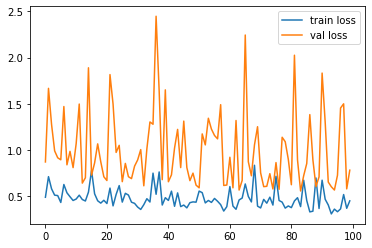

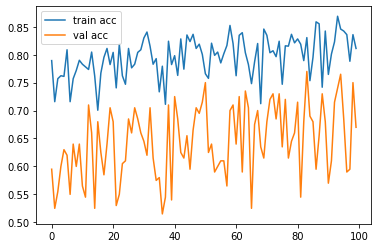

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
### Predictions
import numpy as np
from keras.preprocessing import image

In [26]:
test_image = image.load_img('/content/drive/MyDrive/test/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
  print("Prediction: The person is Uninfected.")
else:
  print("Prediction: The person has Parasitized with Malaria.")

Prediction: The person has Parasitized with Malaria.


In [27]:
test_image = image.load_img('/content/drive/MyDrive/test/Uninfected/C1_thinF_IMG_20150604_104722_cell_115.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
  print("Prediction: The person is Uninfected.")
else:
  print("Prediction: The person has Parasitized with Malaria.")

Prediction: The person is Uninfected.


In [28]:
model.save("/content/drive/MyDrive/Malaria_model.h5")